In [1]:
%pip install -q plotly

In [95]:
%pip install -q seaborn

The dataset consists of about **255** Indian dishes and **9** columns associated with each of them.

The **9** columns are as follows:-

**name** : name of the dish

**ingredients** : main ingredients used

**diet** : type of diet - either vegetarian or non vegetarian

**prep_time** : preparation time

**cook_time** : cooking time

**flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

**course** : course of meal - starter, main course, dessert, etc

**state** : state where the dish is famous or is originated

**region** : region where the state belongs


In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.io as pio
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator


In [8]:
data = pd.read_csv("indian_food.csv")

In [9]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [10]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [11]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 11.0+ KB


In [13]:
data.isnull().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [14]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [15]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)


In [16]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [17]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [18]:
data.shape

(255, 9)

In [47]:
data.describe()

,prep_time,cook_time
count,225.000000,227.000000
mean,35.386667,38.911894
std,76.241081,49.421711
min,5.000000,2.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


In [49]:
diet_counts = data.diet.value_counts()
diet_counts


vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

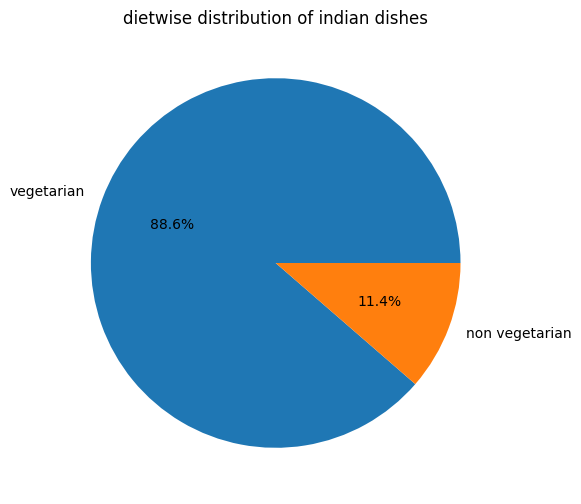

In [50]:
plt.figure(figsize=(12,6))
plt.title('dietwise distribution of indian dishes')
plt.pie(diet_counts,labels=diet_counts.index, autopct='%1.1f%%',startangle=360);

In [53]:
flavor_counts = data.flavor_profile.value_counts()
flavor_counts

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

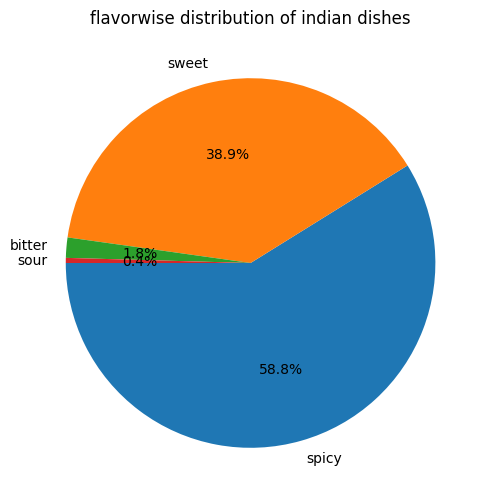

In [57]:
plt.figure(figsize=(12,6))
plt.title('flavorwise distribution of indian dishes')
plt.pie(flavor_counts,labels=flavor_counts.index, autopct='%1.1f%%', startangle=180 );

In [35]:
cooking_time= data[['cook_time','name']]

In [36]:
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [37]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [62]:
ten_cook_quickly=cooking_time.head(10)

In [63]:
cook_data = ten_cook_quickly.cook_time.value_counts().reset_index()


In [74]:
cook_data.head()

,index,cook_time
0,10.0,5
1,5.0,3
2,2.0,1
3,6.0,1


In [75]:
cook_time_counts = data.cook_time.value_counts()
cook_time_counts

30.0     59
20.0     42
40.0     27
60.0     22
45.0     15
25.0     13
50.0     10
35.0      9
90.0      7
10.0      7
15.0      5
120.0     3
5.0       3
75.0      1
720.0     1
55.0      1
2.0       1
6.0       1
Name: cook_time, dtype: int64

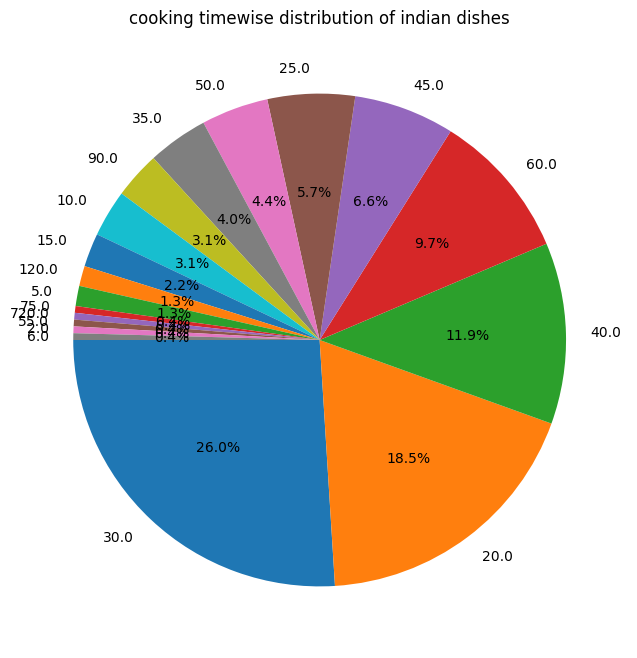

In [89]:
plt.figure(figsize=(12,8))
plt.title('cooking timewise distribution of indian dishes')
plt.pie(cook_time_counts,labels=cook_time_counts.index, autopct='%1.1f%%', startangle=180 );


In [41]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [90]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [91]:
tencooking_time_longest=cooking_time_longest.head(10)

In [92]:
import matplotlib.pyplot as plt

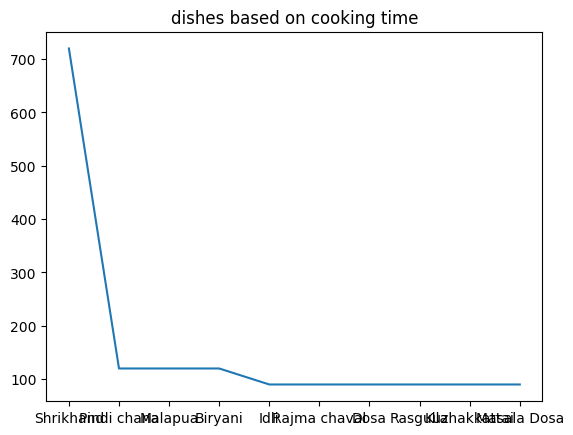

In [93]:
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()

In [96]:
import seaborn as sns

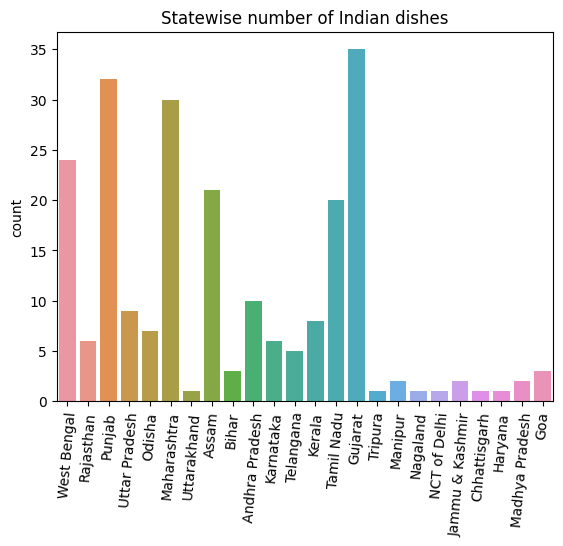

In [97]:
sns.countplot(x=data.state)
plt.xticks(rotation=85);
plt.title('Statewise number of Indian dishes')
plt.xlabel(None);


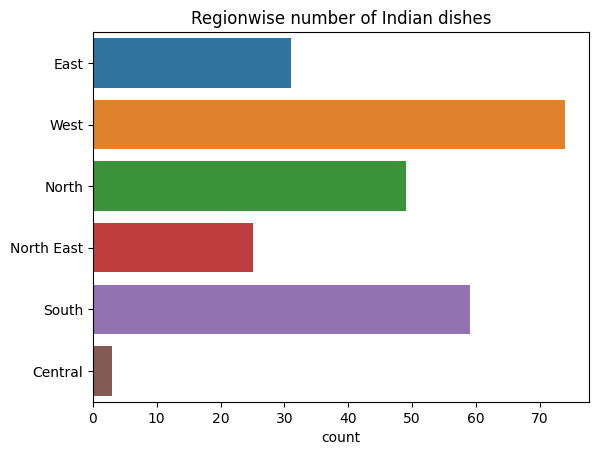

In [98]:
sns.countplot(y=data.region)
plt.title('Regionwise number of Indian dishes')
plt.ylabel(None);
